# Google Natural Language API 

Author: Mohammad Yousuf Hussain, CFA <br>
Senior Technology and Innovation Specialist at HSBC<br><br>
Reference: The material presented below is based on the information provided by Google on Natural Language API

## Table of Contents

1. Required Packages
2. Credentials Authentication Technique
3. Entities Analysis
4. Sentiment Analysis
5. Entities Sentiment Analysis
6. Syntax Analysis

## 1. Required Packages

Google Natural Language API is a product of Google Gloud Platform. User has to install the Google Cloud Package to be able to run the Natural Language API. Along with installing the Google Cloud package, the user also has to make sure it has six, argparse and sys packages installed. The commands below are importing required packages.

In [1]:
from google.cloud import language

In [154]:
import argparse
import sys

from google.cloud import language
from google.cloud.language import enums
from google.cloud.language import types

import six
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd

## 2. Credentials Authentication Technique

Google requires the users to authenticate their credentials before accessing the Google Cloud Platform. Within the Google Cloud Platform, the user needs to enable Natural Language API, which is done at project level. At project level, the user has to create a service account and acquire authentication key, which is a json file. The user needs to refer the address of the credential file to "Google_APPLICATION_CREDENTIALS" variable shown down below.

In [3]:
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="HSBC-Mind.json"

## 3. Entities Analysis

Entity Analysis inspects the given text for known entities (proper nouns such as public figures, landmarks, etc.), and returns information about those entities. <br><br>
Entities broadly fall into two categories: proper nouns that map to unique entities (specific people, places, etc.) or common nouns (also called "nominals" in natural language processing). <br><br>
Entity analysis returns a set of detected entities, and parameters associated with those entities, such as the entity's type, relevance of the entity to the overall text, and locations in the text that refer to the same entity. Entities are returned in the order (highest to lowest) of their salience scores, which reflect their relevance to the overall text.<br><br>
The salience score for an entity provides information about the importance or centrality of that entity to the entire document text. Scores closer to 0 are less salient, while scores closer to 1.0 are highly salient.<br><br>
The function below documents the technique required to analyze entities:

In [4]:
def entities_text(text):
    """Detects entities in the text."""
    client = language.Client.from_service_account_json('HSBC-Mind.json')
    client = language.LanguageServiceClient()

    if isinstance(text, six.binary_type):
        text = text.decode('utf-8')

    # Instantiates a plain text document.
    document = types.Document(
        content=text,
        type=enums.Document.Type.PLAIN_TEXT)

    # Detects entities in the document. You can also analyze HTML with:
    #   document.type == enums.Document.Type.HTML
    entities = client.analyze_entities(document).entities

    # entity types from enums.Entity.Type
    entity_type = ('UNKNOWN', 'PERSON', 'LOCATION', 'ORGANIZATION',
                   'EVENT', 'WORK_OF_ART', 'CONSUMER_GOOD', 'OTHER')

    for entity in entities:
        print('=' * 20)
        print(u'{:<16}: {}'.format('name', entity.name))
        print(u'{:<16}: {}'.format('type', entity_type[entity.type]))
        print(u'{:<16}: {}'.format('metadata', entity.metadata))
        print(u'{:<16}: {}'.format('salience', entity.salience))
        print(u'{:<16}: {}'.format('wikipedia_url',
              entity.metadata.get('wikipedia_url', '-')))

Sample text can be placed in the variable below, or else the variable can also be connected to an input adapter. 

In [149]:
text = "While it seems Draghi plans to wait as the technology matures, Christine Lagarde, managing director of the International Monetary Fund (IMF), recently said that  must be taken seriously as they have the potential to cause massive disruptions."

The result of entity analysis can be viewed by calling the function, as shown below:

In [89]:
#analyze_entities = entities_text(text)


In [66]:
def entities_text1(text):
    
    "Initialize entity features"
    entity_name = []
    entity_type = []
    entity_salience = []
    
    """Detects entities in the text."""
    client = language.Client.from_service_account_json('HSBC-Mind.json')
    client = language.LanguageServiceClient()

    if isinstance(text, six.binary_type):
        text = text.decode('utf-8')

    # Instantiates a plain text document.
    document = types.Document(
        content=text,
        type=enums.Document.Type.PLAIN_TEXT)

    # Detects entities in the document. You can also analyze HTML with:
    #   document.type == enums.Document.Type.HTML
    entities = client.analyze_entities(document).entities
    
    
    for entity in entities:
        entity_name.append(entity.name)
        entity_type.append(entity.type)
        entity_salience.append(entity.salience)
        
        
    return entity_name, entity_salience

In [150]:
analyze_entities1, analyze_entities2 = entities_text1(text)

In [151]:
df_1 = pd.DataFrame(analyze_entities1)
df_1.columns = ['Name']
df_2 = pd.DataFrame(analyze_entities2)
df_2.columns = ['Salience']
df_joined = df_1.join(df_2)
df_joined.head()

,Name,Salience
0,Draghi,0.293647
1,Christine Lagarde,0.269032
2,technology,0.195524
3,potential,0.092083
4,International Monetary Fund,0.084606


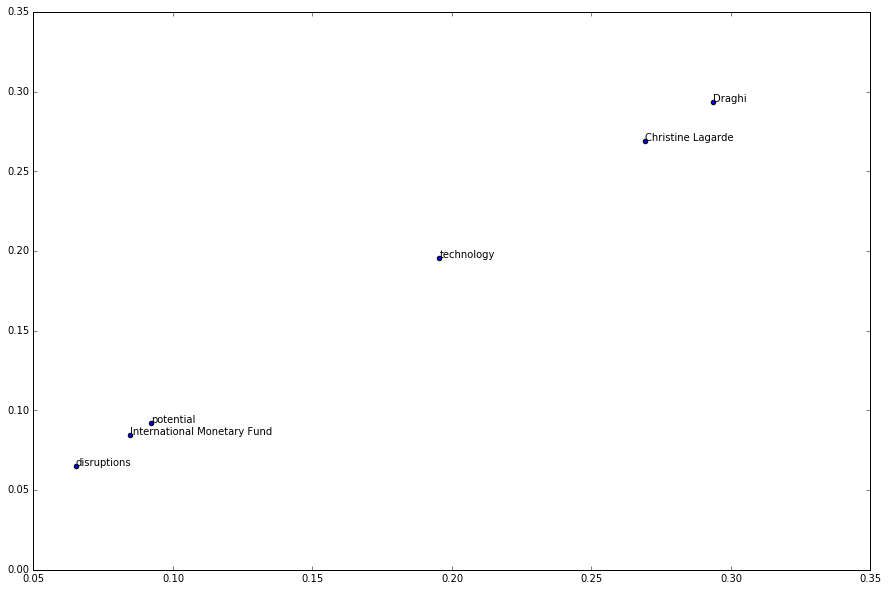

In [152]:
plt.figure(figsize=(15,10))
plt.scatter(df_joined['Salience'],df_joined['Salience'])

for i in range(0,len(df_joined)) :
    plt.annotate(df_joined['Name'][i], (df_joined['Salience'][i],df_joined['Salience'][i]))

## 4. Sentiment Analysis

Sentiment Analysis inspects the given text and identifies the prevailing emotional opinion within the text, especially to determine a writer's attitude as positive, negative, or neutral. Sentiment analysis is performed through the analyzeSentiment method.<br><br>
Sentiment analysis attempts to determine the overall attitude (positive or negative) expressed within the text. Sentiment is represented by numerical score and magnitude values.<br><br>
The score of a document's sentiment indicates the overall emotion of a document. The magnitude of a document's sentiment indicates how much emotional content is present within the document, and this value is often proportional to the length of the document.<br><br>
A document with a neutral score (around 0.0) may indicate a low-emotion document, or may indicate mixed emotions, with both high positive and negative values which cancel each out. Generally, you can use magnitude values to disambiguate these cases, as truly neutral documents will have a low magnitude value, while mixed documents will have higher magnitude values.<br><br>
When comparing documents to each other (especially documents of different length), make sure to use the magnitude values to calibrate your scores, as they can help you gauge the relevant amount of emotional content.<br><br>
The function below documents the technique required to analyze sentiment:


In [205]:
def analyze(review_filename):
    """Run a sentiment analysis request on text within a passed filename."""
    client = language.LanguageServiceClient()

    with open(review_filename, 'r') as review_file:
        # Instantiates a plain text document.
        content = review_file.read()

    document = types.Document(
        content=content,
        type=enums.Document.Type.PLAIN_TEXT)
    annotations = client.analyze_sentiment(document=document)

    # Print the results
    print_result(annotations)
    
    "Initialize parameters"
    running_score = []
    running_magnitude = []

    
    for index, sentence in enumerate(annotations.sentences):
        sentence_sentiment = sentence.sentiment.score

        running_score.append(sentence_sentiment)

        sentence_magnitude = sentence.sentiment.magnitude
        running_magnitude.append(sentence_magnitude)
        
    return running_score, running_magnitude

In [206]:
def print_result(annotations):
    "Initialize parameters"
    running_score = []
    running_magnitude = []
    
    
    score = annotations.document_sentiment.score
    magnitude = annotations.document_sentiment.magnitude

    for index, sentence in enumerate(annotations.sentences):
        sentence_sentiment = sentence.sentiment.score
        print('Sentence {} has a sentiment score of {}'.format(
            index, sentence_sentiment))
        running_score.append(sentence_sentiment)
        
        sentence_magnitude = sentence.sentiment.magnitude
        running_magnitude.append(sentence_magnitude)

    print('Overall Sentiment: score of {} with magnitude of {}'.format(
        score, magnitude))
    return running_score

In [208]:
#analyze_sent_score, analyze_sent_magnitude  = analyze('sample.txt')

In [209]:
df_3 = pd.DataFrame(analyze_sent_score)
df_3.columns = ['Score']
df_4 = pd.DataFrame(analyze_sent_magnitude)
df_4.columns = ['Magnitude']
df_overall = df_3.join(df_4)
df_overall.head()

,Score,Magnitude
0,0.0,0.0
1,-0.6,0.6
2,0.2,0.2
3,-0.7,0.7
4,-0.2,0.2


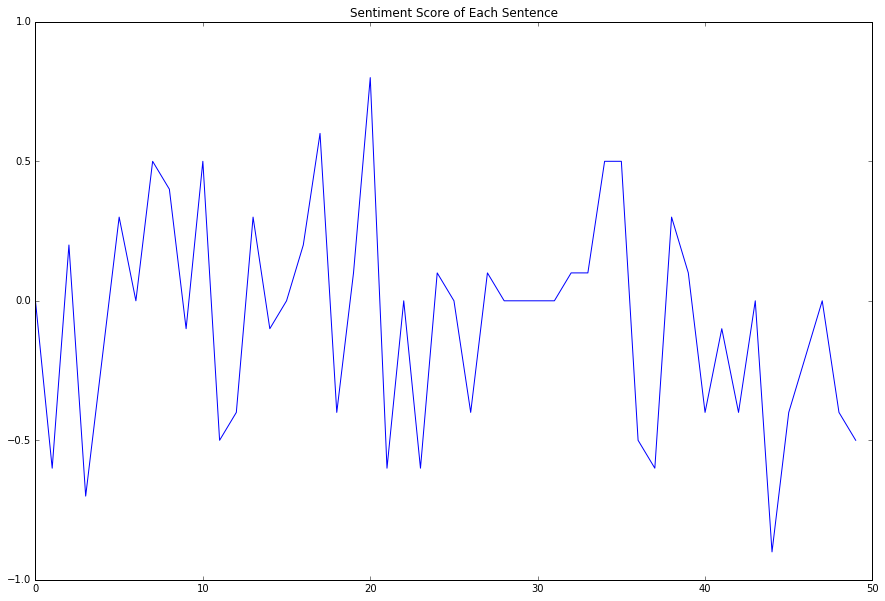

In [214]:
plt.figure(figsize=(15,10))
plt.plot(df_overall['Score'])
plt.title('Sentiment Score of Each Sentence')

## 5. Entities Sentiment Analysis

Entity Sentiment Analysis combines both entity analysis and sentiment analysis and attempts to determine the sentiment (positive or negative) expressed about entities within the text. Entity sentiment is represented by numerical score and magnitude values and is determined for each mention of an entity. Those scores are then aggregated into an overall sentiment score and magnitude for an entity.<br><br>
The Natural Language API processes the given text to extract the entities and determine sentiment. An Entity Sentiment Analysis request returns a response containing the entities that were found in the document content, a mentions entry for each time the entity is mentioned, and the numerical score and magnitude values for each mention, as described in Interpreting sentiment analysis values. The overall score and magnitude values for an entity are an aggregate of the specific score and magnitude values for each mention of the entity. The score and magnitude values for an entity can be 0, if there was low sentiment in the text, resulting in a magnitude of 0, or the sentiment is mixed, resulting in a score of 0.<br><br>
Implementation example of entities sentiment analysis will be provided in later versions of this notebook.

## 6. Syntax Analysis

Syntactic Analysis extracts linguistic information, breaking up the given text into a series of sentences and tokens (generally, word boundaries), providing further analysis on those tokens. Syntactic Analysis is performed with the analyzeSyntax method.<br><br>
When performing syntactic analysis, the Natural Language API returns an array of sentences extracted from the provided text, with each sentence containing the following fields within a text parent:<br>
- beginOffset: indicating the (zero-based) character offset within the given text where the sentence begins. Note that this offset is calculated using the passed encodingType.<br>
- content: containing the full text of the extracted sentence.


The analyzeSyntax method also transforms text into a series of tokens, which correspond to the different textual elements (word boundaries) of the passed content. The process by which the Natural Language API develops this set of tokens is known as tokenization.<br><br>
Once these tokens are extracted, the Natural Language API processes them to determine their associated part of speech (including morphological information) and lemma. <br><br>
Implementation example of synatax analysis will be provided in later versions of this notebook.

